In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'veneto'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,5,Veneto,1542,289,1831,29976,31807,-728,871,...,28.0,25722.0,3379.0,-634.0,15.78,5.76,3.39,25.78,-2.36,-2.24
412,2021-04-12T17:00:00,5,Veneto,1568,286,1854,29833,31687,-120,587,...,11.0,11747.0,2538.0,-143.0,15.43,5.85,5.00,23.13,-1.04,-0.38
413,2021-04-13T17:00:00,5,Veneto,1534,269,1803,28756,30559,-1128,883,...,42.0,35791.0,3705.0,-1077.0,14.92,5.90,2.47,23.83,-5.94,-3.56
414,2021-04-14T17:00:00,5,Veneto,1461,260,1721,27721,29442,-1117,1081,...,24.0,40474.0,4403.0,-1035.0,15.11,5.85,2.67,24.55,-3.35,-3.66


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1085
Nuovi tamponi: 35360.0
Percentuale nuovi positivi/nuovi tamponi: 3.1 %
Nuovi guariti: 2172.0
Nuovi deceduti: 23.0
Variazione positivi ricoverati con sintomi: -65.0
Variazione positivi in terapia intensiva: -16.0
Variazione positivi in isolamento dimiciliare: -1029.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,5,Veneto,927,113,1040,23774,24814,-115,515,...,9.0,17106.0,2290.0,-102.0,10.87,4.19,3.01,22.49,1.80,-0.46
1,2021-02-15T17:00:00,5,Veneto,929,110,1039,23771,24810,-4,241,...,11.0,8221.0,1417.0,-3.0,10.59,4.19,2.93,17.01,-2.65,-0.02
2,2021-02-16T17:00:00,5,Veneto,893,102,995,23258,24253,-557,638,...,42.0,35030.0,2598.0,-513.0,10.25,4.10,1.82,24.56,-7.27,-2.25
3,2021-02-17T17:00:00,5,Veneto,875,97,972,22406,23378,-875,492,...,70.0,39030.0,2837.0,-852.0,9.98,4.16,1.26,17.34,-4.90,-3.61
4,2021-02-18T17:00:00,5,Veneto,830,98,928,21058,21986,-1392,1042,...,30.0,33254.0,3400.0,-1348.0,10.56,4.22,3.13,30.65,1.03,-5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,5,Veneto,1542,289,1831,29976,31807,-728,871,...,28.0,25722.0,3379.0,-634.0,15.78,5.76,3.39,25.78,-2.36,-2.24
57,2021-04-12T17:00:00,5,Veneto,1568,286,1854,29833,31687,-120,587,...,11.0,11747.0,2538.0,-143.0,15.43,5.85,5.00,23.13,-1.04,-0.38
58,2021-04-13T17:00:00,5,Veneto,1534,269,1803,28756,30559,-1128,883,...,42.0,35791.0,3705.0,-1077.0,14.92,5.90,2.47,23.83,-5.94,-3.56
59,2021-04-14T17:00:00,5,Veneto,1461,260,1721,27721,29442,-1117,1081,...,24.0,40474.0,4403.0,-1035.0,15.11,5.85,2.67,24.55,-3.35,-3.66


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

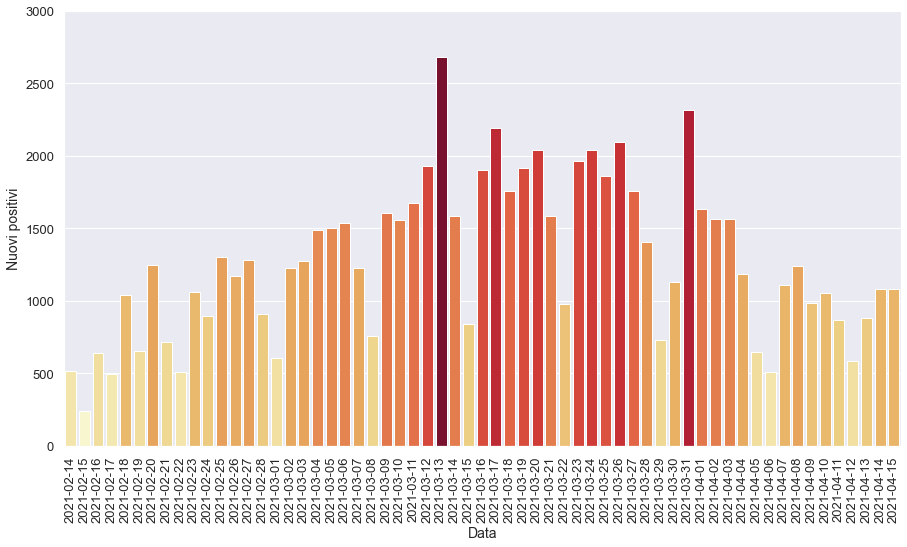

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

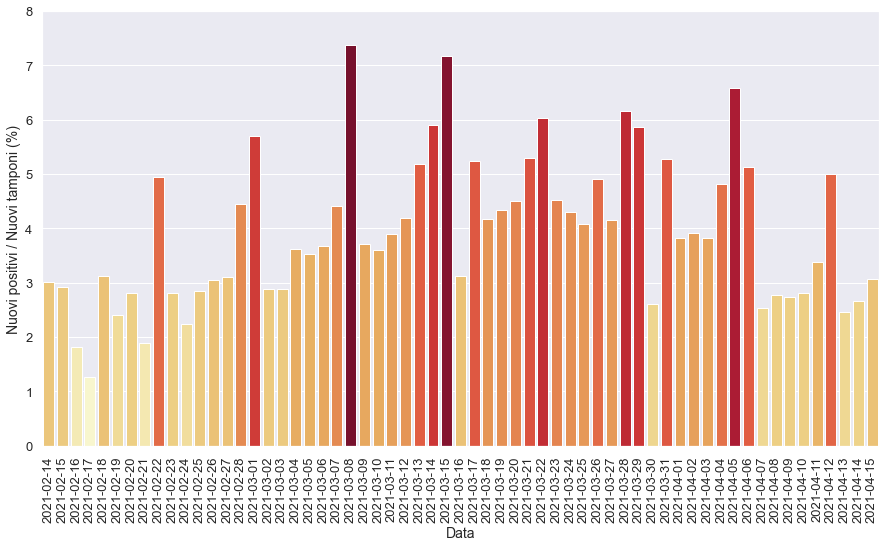

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

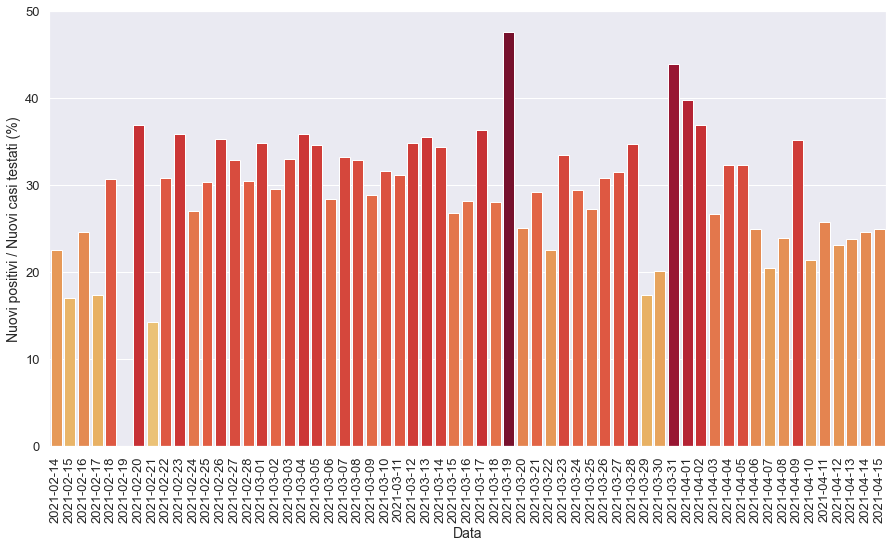

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

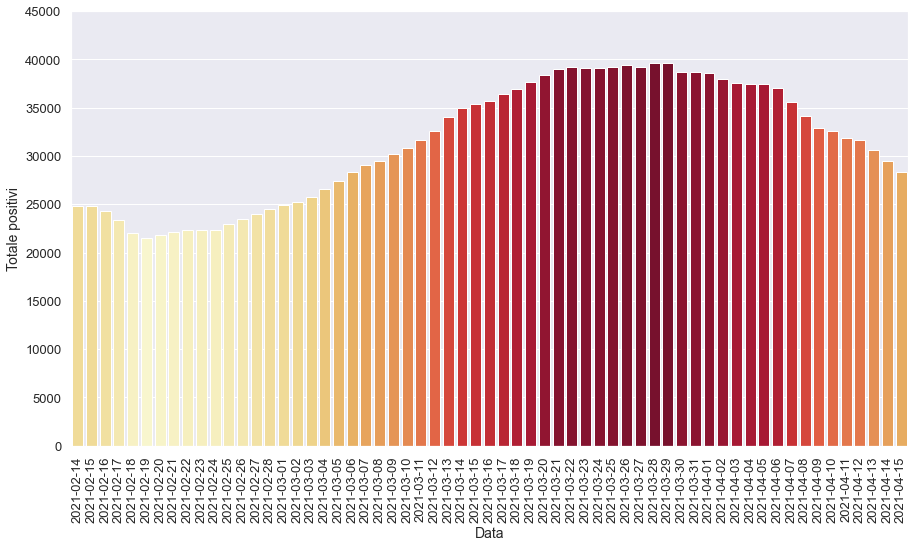

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

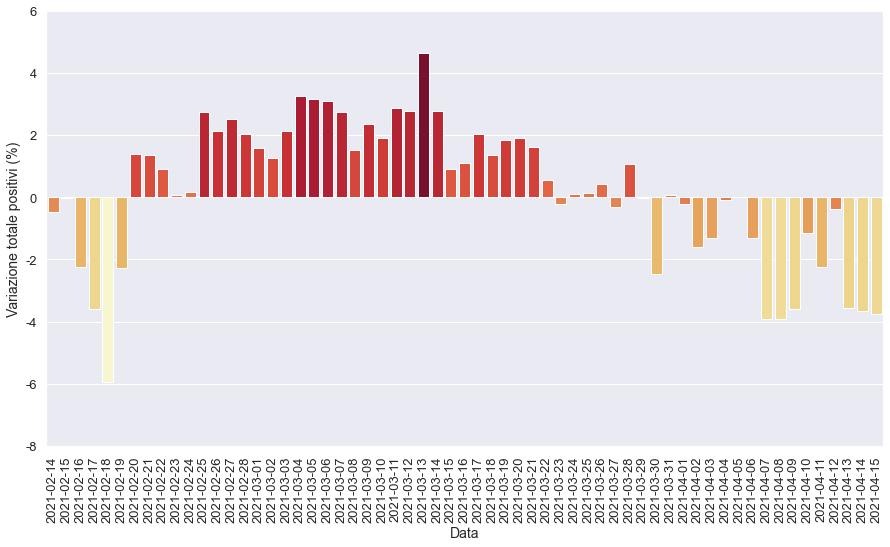

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

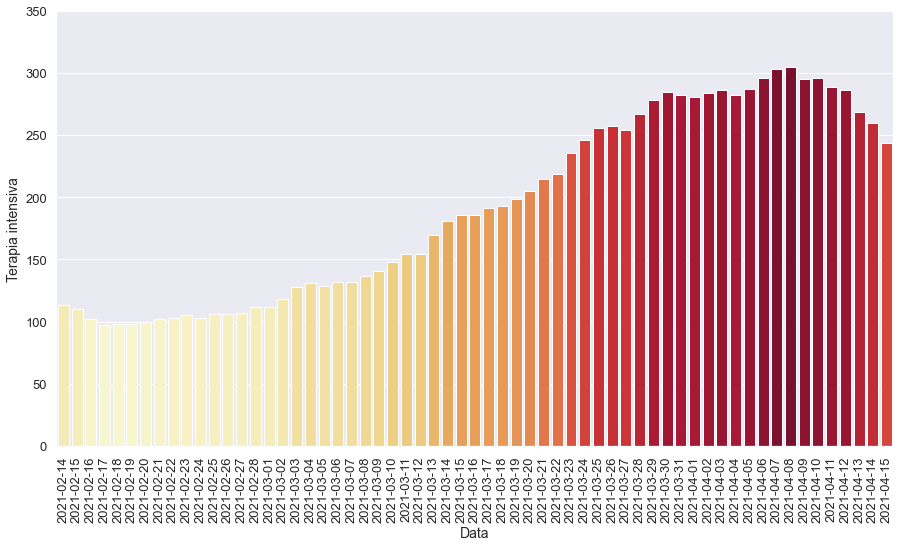

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

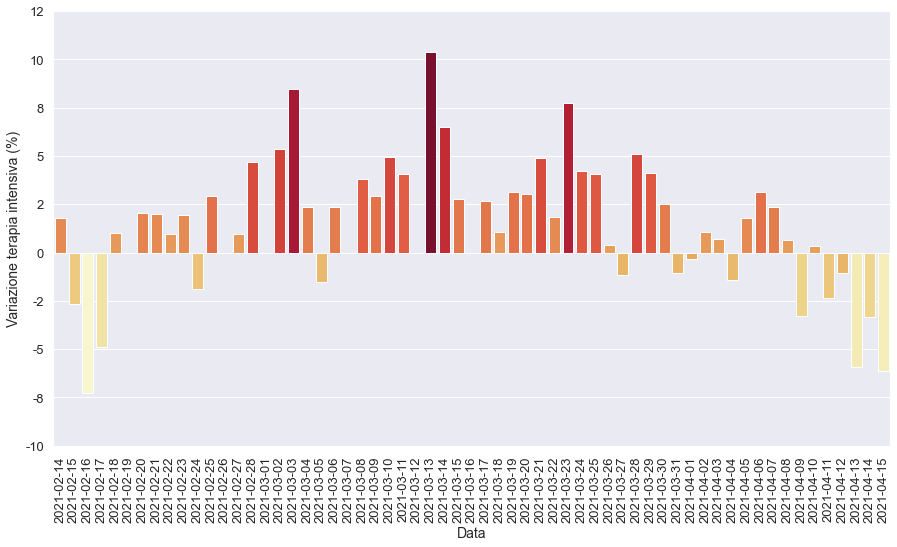

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

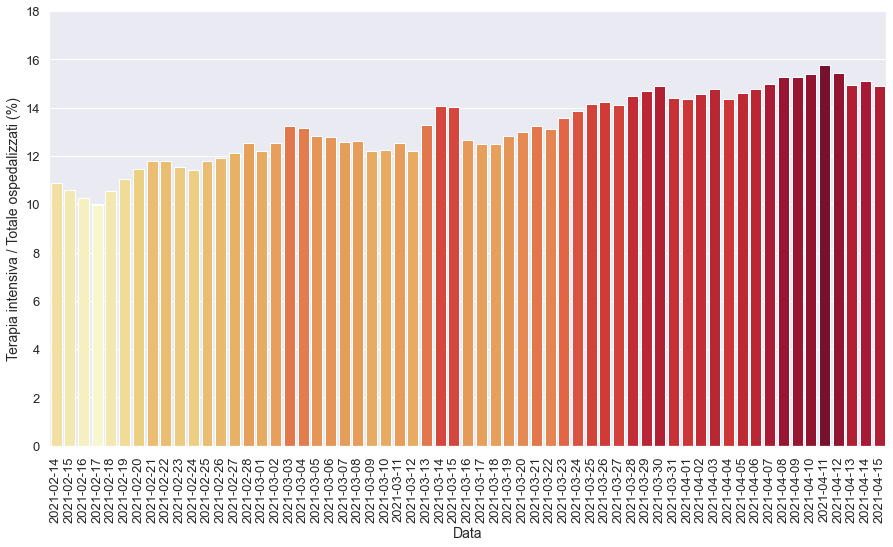

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

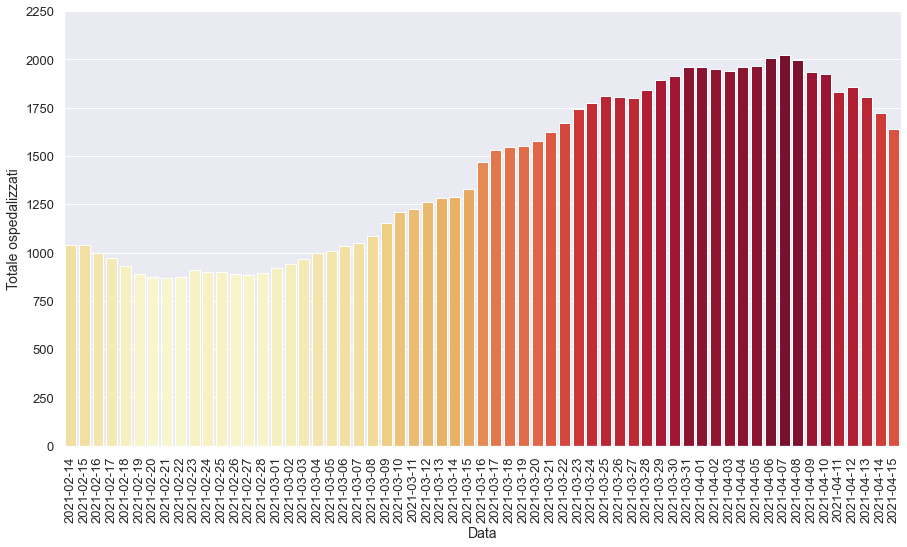

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

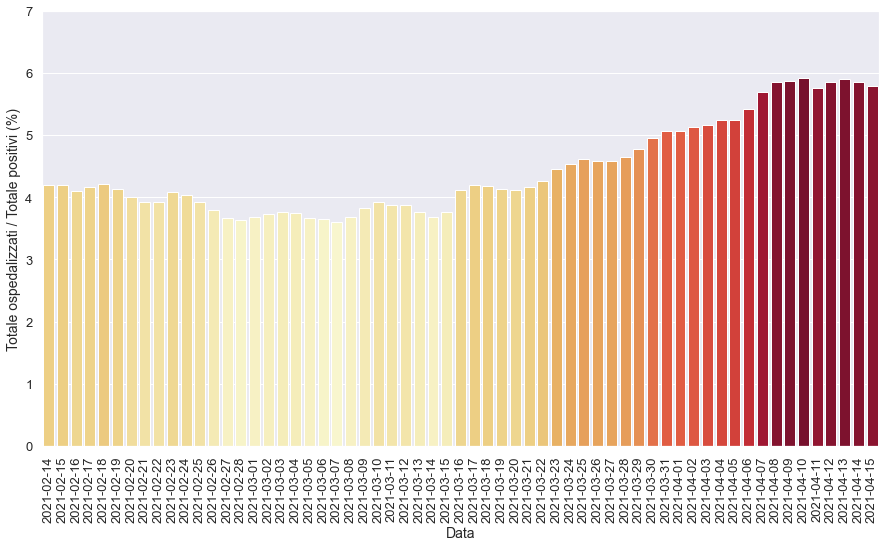

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

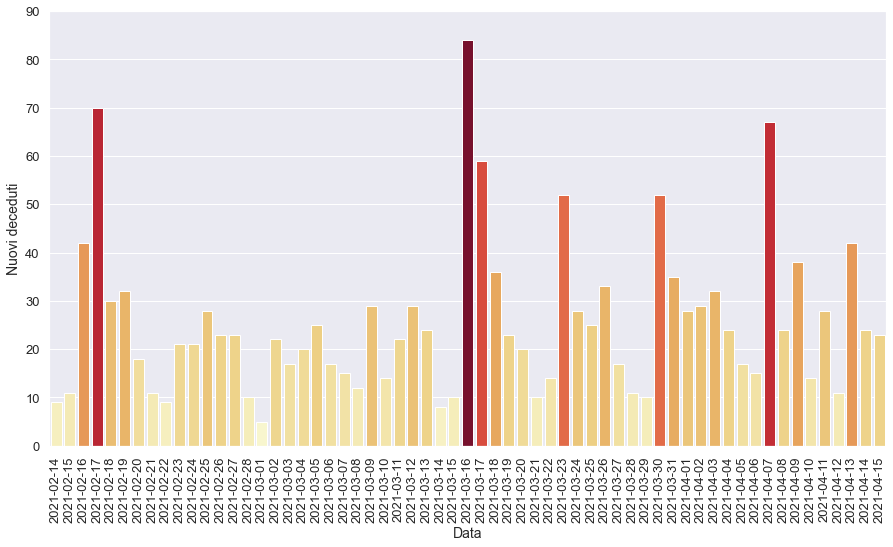

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

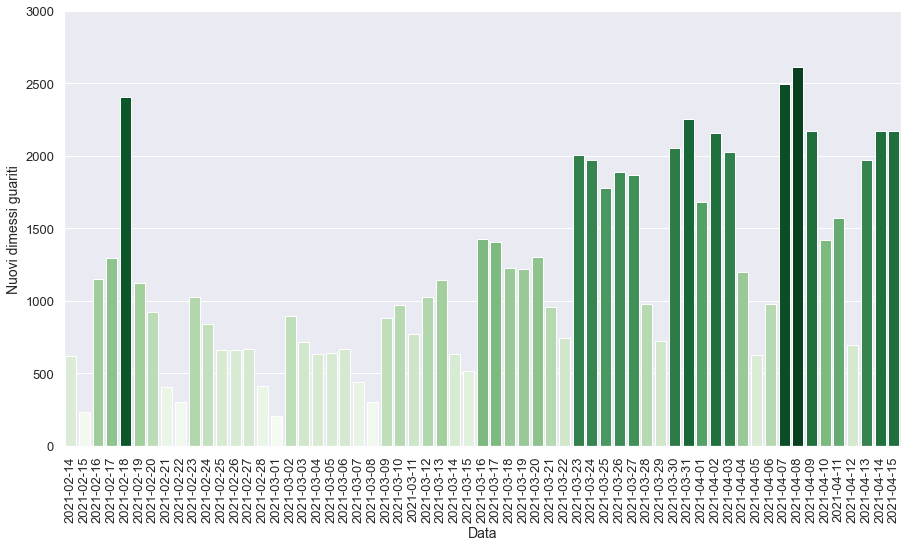

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,5,Veneto,1282,186,1468,34245,35713,389,1901,...,84.0,60767.0,6750.0,248.0,12.67,4.11,3.13,28.16,0.00,1.10
1,2021-03-17T17:00:00,5,Veneto,1337,191,1528,34914,36442,729,2191,...,59.0,41845.0,6031.0,669.0,12.50,4.19,5.24,36.33,2.69,2.04
2,2021-03-18T17:00:00,5,Veneto,1352,193,1545,35393,36938,496,1761,...,36.0,42222.0,6283.0,479.0,12.49,4.18,4.17,28.03,1.05,1.36
3,2021-03-19T17:00:00,5,Veneto,1353,199,1552,36061,37613,675,1917,...,23.0,44254.0,4027.0,668.0,12.82,4.13,4.33,47.60,3.11,1.83
4,2021-03-20T17:00:00,5,Veneto,1372,205,1577,36756,38333,720,2044,...,20.0,45397.0,8156.0,695.0,13.00,4.11,4.50,25.06,3.02,1.91
5,2021-03-21T17:00:00,5,Veneto,1409,215,1624,37330,38954,621,1586,...,10.0,29973.0,5439.0,574.0,13.24,4.17,5.29,29.16,4.88,1.62
6,2021-03-22T17:00:00,5,Veneto,1452,219,1671,37503,39174,220,981,...,14.0,16281.0,4351.0,173.0,13.11,4.27,6.03,22.55,1.86,0.56
7,2021-03-23T17:00:00,5,Veneto,1505,236,1741,37342,39083,-91,1966,...,52.0,43375.0,5877.0,-161.0,13.56,4.45,4.53,33.45,7.76,-0.23
8,2021-03-24T17:00:00,5,Veneto,1529,246,1775,37353,39128,45,2042,...,28.0,47435.0,6950.0,11.0,13.86,4.54,4.30,29.38,4.24,0.12
9,2021-03-25T17:00:00,5,Veneto,1556,256,1812,37371,39183,55,1861,...,25.0,45633.0,6841.0,18.0,14.13,4.62,4.08,27.20,4.07,0.14


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

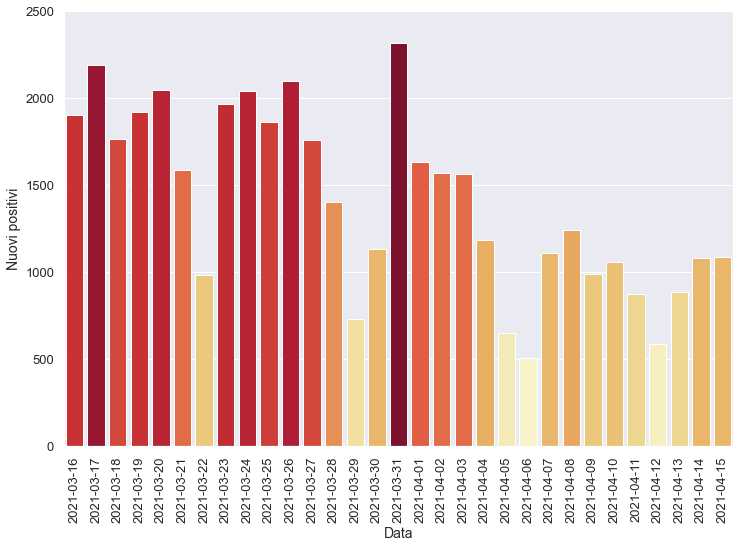

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

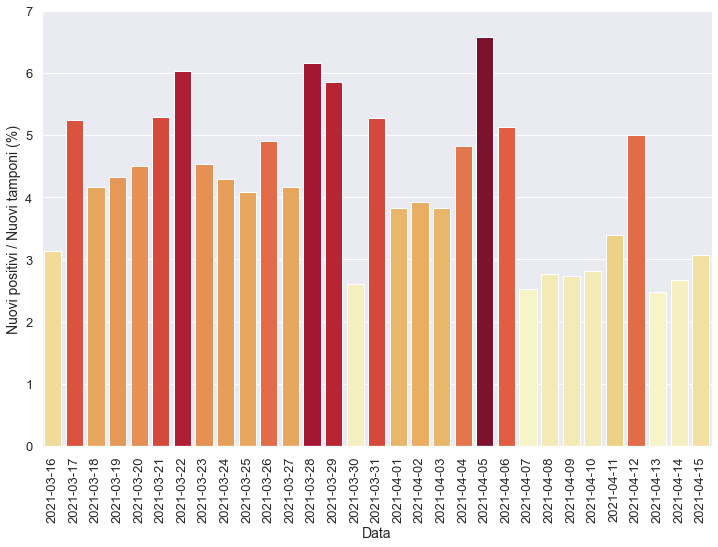

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

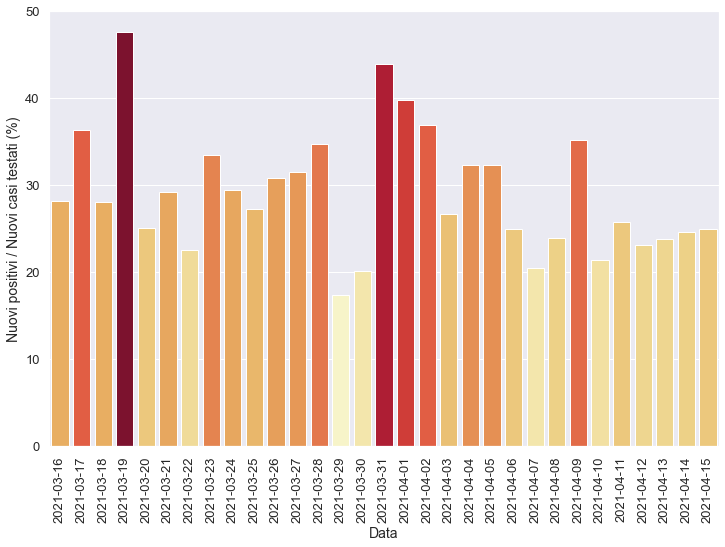

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

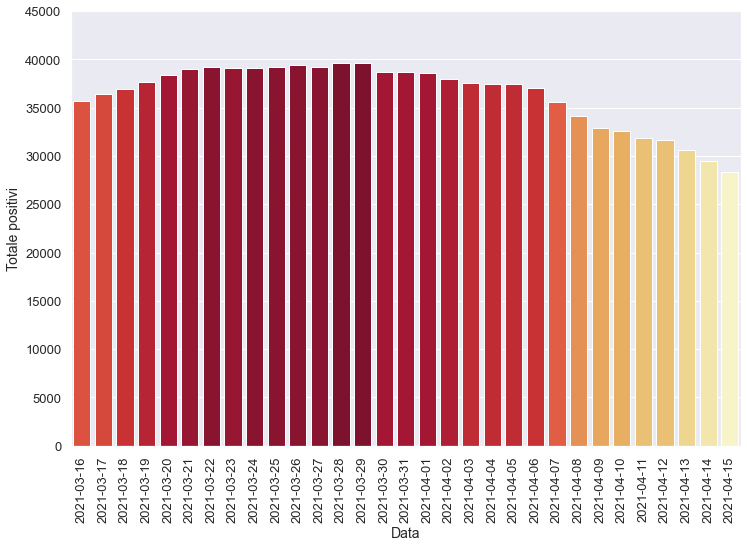

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

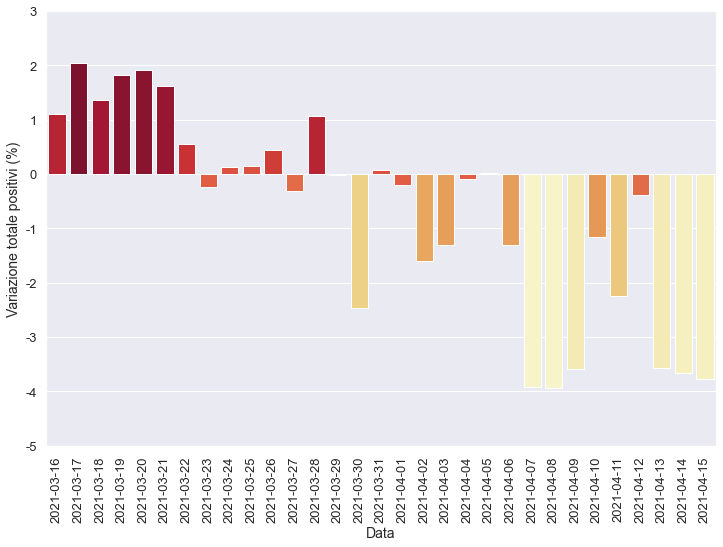

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

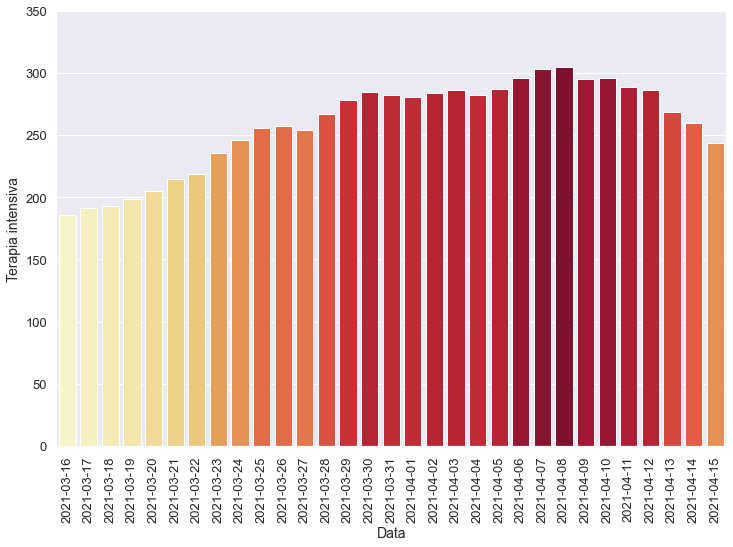

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

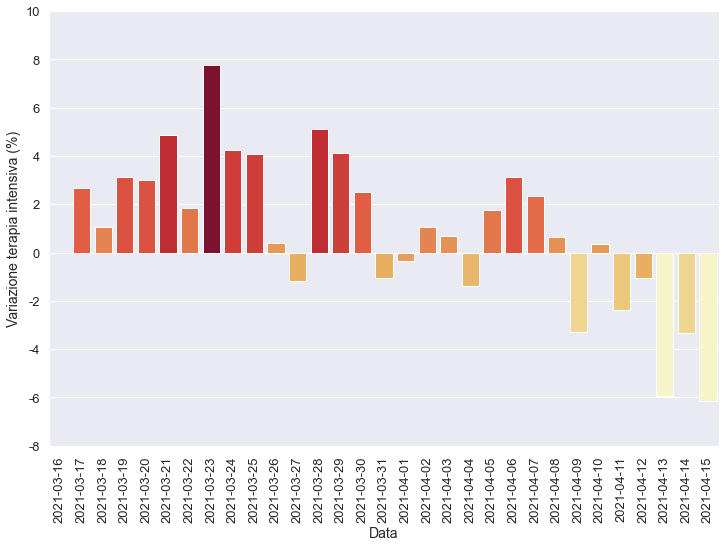

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

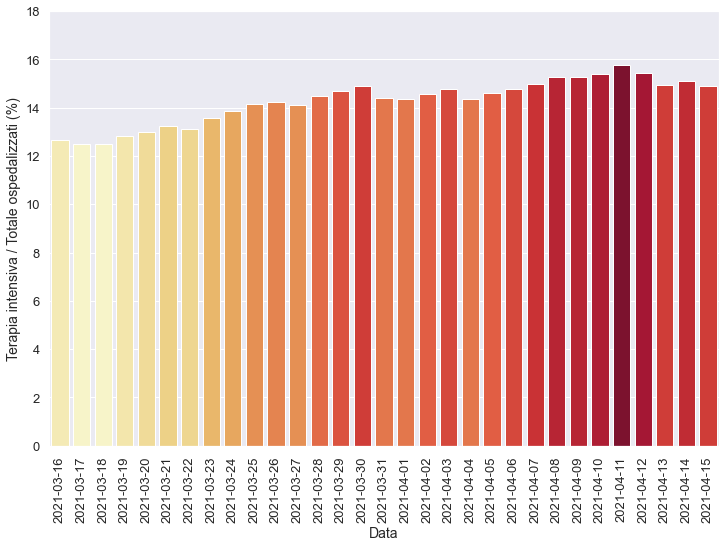

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

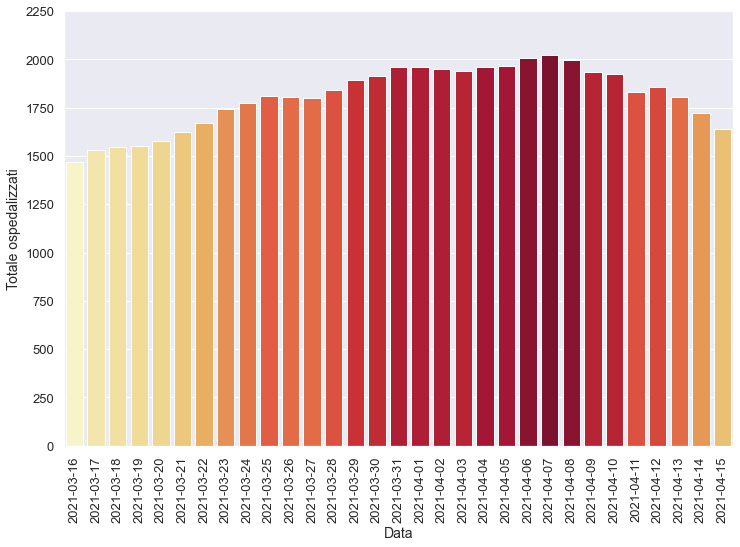

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

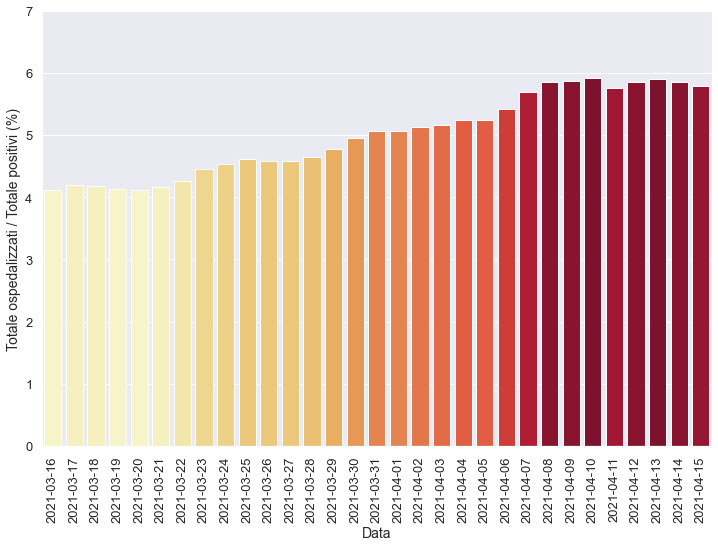

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

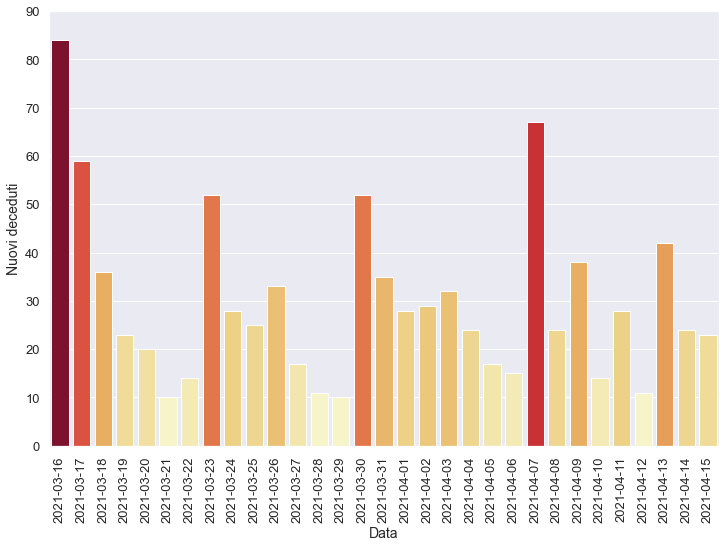

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

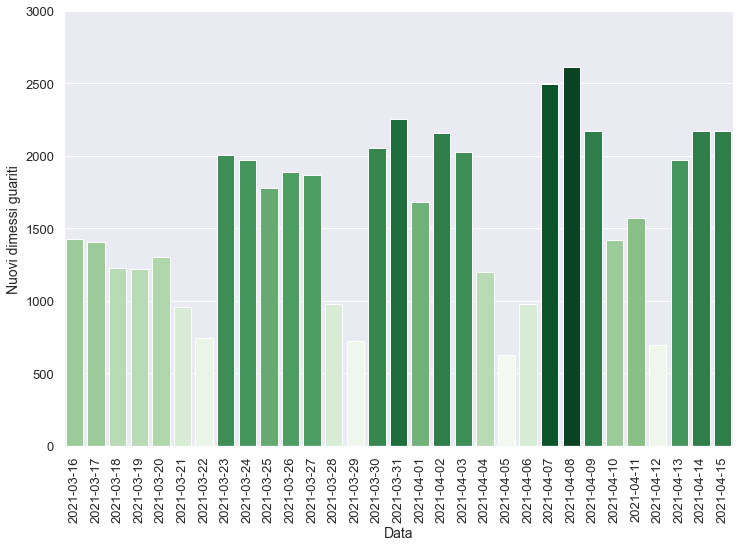

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,5,Veneto,1693,305,1998,32141,34139,-1398,1241,...,24.0,44878.0,5185.0,-1373.0,15.27,5.85,2.77,23.93,0.66,-3.93
1,2021-04-09T17:00:00,5,Veneto,1637,295,1932,30986,32918,-1221,988,...,38.0,36098.0,2810.0,-1155.0,15.27,5.87,2.74,35.16,-3.28,-3.58
2,2021-04-10T17:00:00,5,Veneto,1629,296,1925,30610,32535,-383,1054,...,14.0,37501.0,4940.0,-376.0,15.38,5.92,2.81,21.34,0.34,-1.16
3,2021-04-11T17:00:00,5,Veneto,1542,289,1831,29976,31807,-728,871,...,28.0,25722.0,3379.0,-634.0,15.78,5.76,3.39,25.78,-2.36,-2.24
4,2021-04-12T17:00:00,5,Veneto,1568,286,1854,29833,31687,-120,587,...,11.0,11747.0,2538.0,-143.0,15.43,5.85,5.00,23.13,-1.04,-0.38
5,2021-04-13T17:00:00,5,Veneto,1534,269,1803,28756,30559,-1128,883,...,42.0,35791.0,3705.0,-1077.0,14.92,5.90,2.47,23.83,-5.94,-3.56
6,2021-04-14T17:00:00,5,Veneto,1461,260,1721,27721,29442,-1117,1081,...,24.0,40474.0,4403.0,-1035.0,15.11,5.85,2.67,24.55,-3.35,-3.66
7,2021-04-15T17:00:00,5,Veneto,1396,244,1640,26692,28332,-1110,1085,...,23.0,35360.0,4348.0,-1029.0,14.88,5.79,3.07,24.95,-6.15,-3.77


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

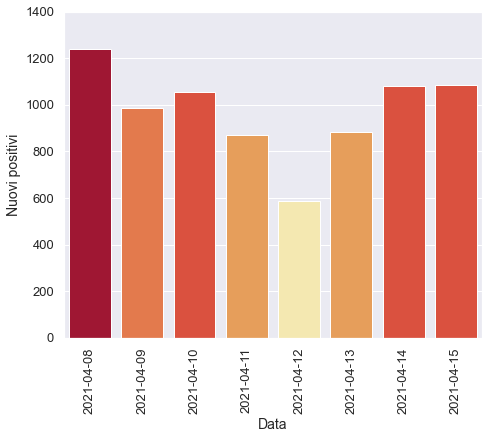

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

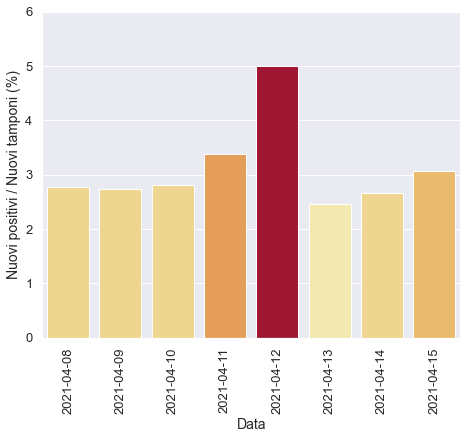

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

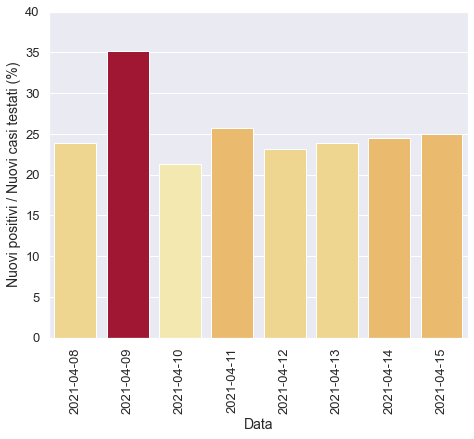

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

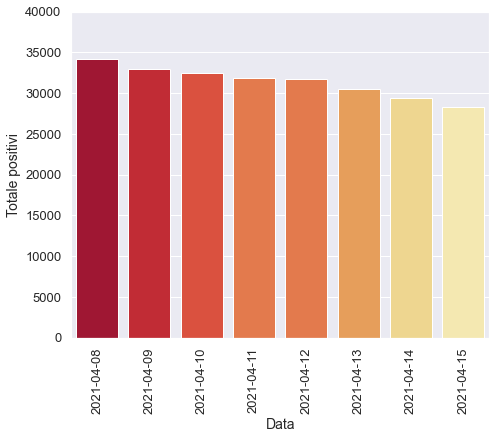

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

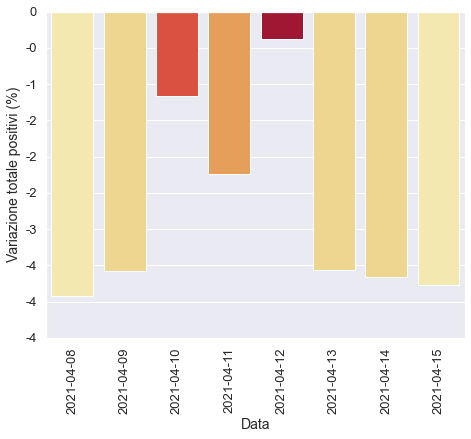

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

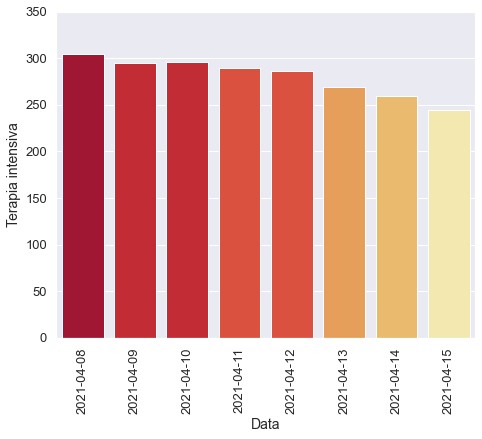

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

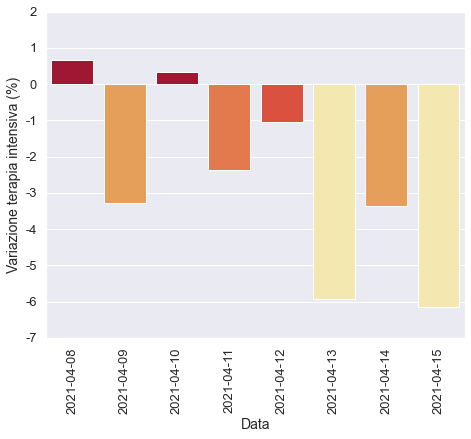

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

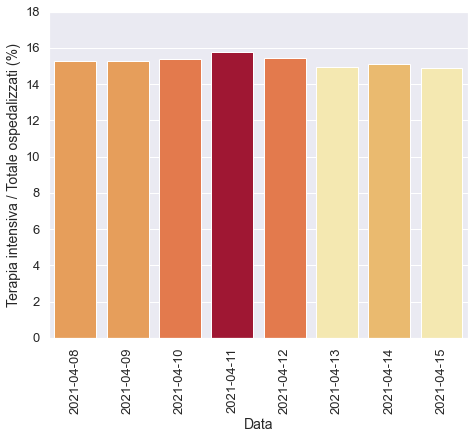

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

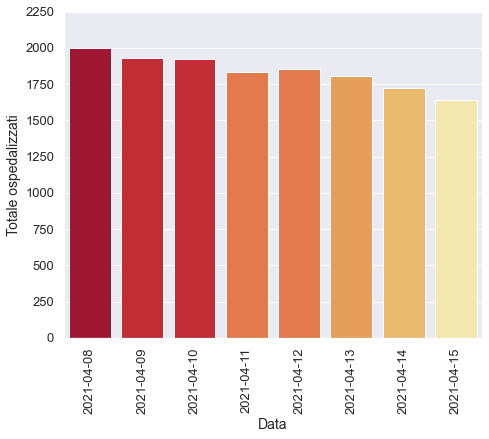

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

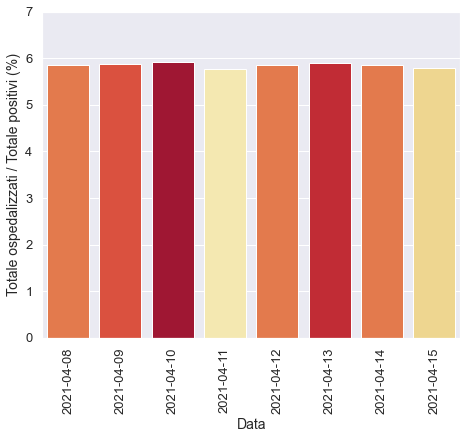

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

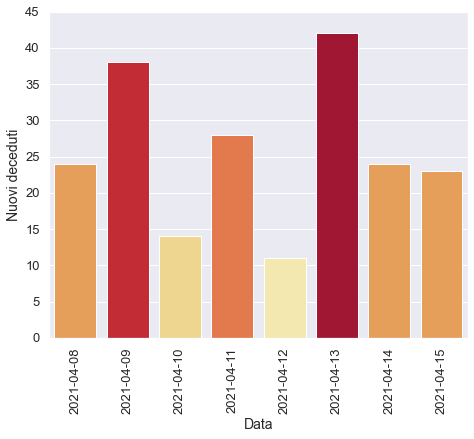

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

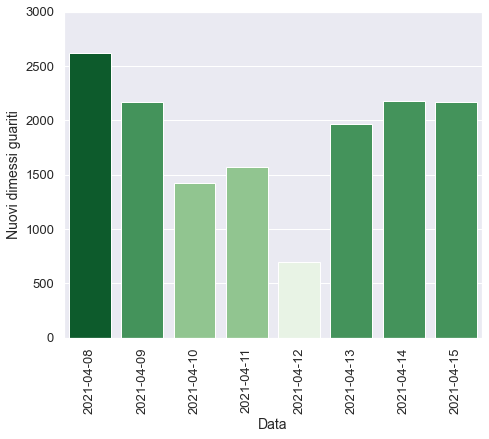

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)